In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import missingno as msn

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100

In [54]:
# Load in data
df = pd.read_csv('data/initial_data/train.csv')

# Parse price
df['Price'] = df.apply(lambda x: int((x['Price'][1:]).split(".")[0].replace(",", "")), axis=1)

# Drop id as id is not useful for eda here
df = df.drop(columns=['id'], axis=1)


In [64]:
sum(df.isna().sum()) / (df.shape[0] * df.shape[1])

0.013633669235328987

In [55]:
df.head(1)

,Decision,Host_response_time,Host_is_superhost,Host_has_profile_pic,Host_identity_verified,Neighbourhood,Property_type,Room_type,Accommodates,Bathrooms_text,Bedrooms,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating,Instant_bookable,Month
0,1,within an hour,t,t,t,28806,Entire cabin,Entire home/apt,6,1 bath,3.0,3.0,5,5,1,1,164,90,4.93,t,August


In [61]:
print(df.isna().sum())

Decision                    0
Host_response_time        858
Host_is_superhost          96
Host_has_profile_pic       96
Host_identity_verified     96
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Bedrooms                  585
Beds                       13
Essentials                  0
Cooking                     0
Balcony                     0
Parking                     0
Price                       0
Number_of_reviews           0
Review_scores_rating      395
Instant_bookable            0
Month                       0
dtype: int64


In [32]:
# Check summary statistics
df.describe()

,id,Decision,Neighbourhood,Accommodates,Bedrooms,Beds,Essentials,Cooking,Balcony,Parking,Price,Number_of_reviews,Review_scores_rating
count,7471.000000,7471.000000,7471.000000,7471.000000,6886.000000,7458.000000,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000,7471.000000,7076.000000
mean,3736.000000,0.633784,28793.443180,4.293267,1.837932,2.289890,4.723598,3.626824,0.632044,0.958506,184.457101,87.481997,4.881412
std,2156.836263,0.481802,29.064001,2.762739,1.125600,1.738629,0.617703,1.627228,0.482282,0.199443,174.435976,107.129371,0.238291
min,1.000000,0.000000,28704.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000
25%,1868.500000,0.000000,28801.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,93.000000,13.000000,4.850000
50%,3736.000000,1.000000,28804.000000,4.000000,1.000000,2.000000,5.000000,4.000000,1.000000,1.000000,137.000000,50.000000,4.930000
75%,5603.500000,1.000000,28806.000000,6.000000,2.000000,3.000000,5.000000,5.000000,1.000000,1.000000,223.000000,121.000000,4.990000
max,7471.000000,1.000000,28806.000000,16.000000,9.000000,18.000000,5.000000,5.000000,1.000000,1.000000,3500.000000,1059.000000,5.000000


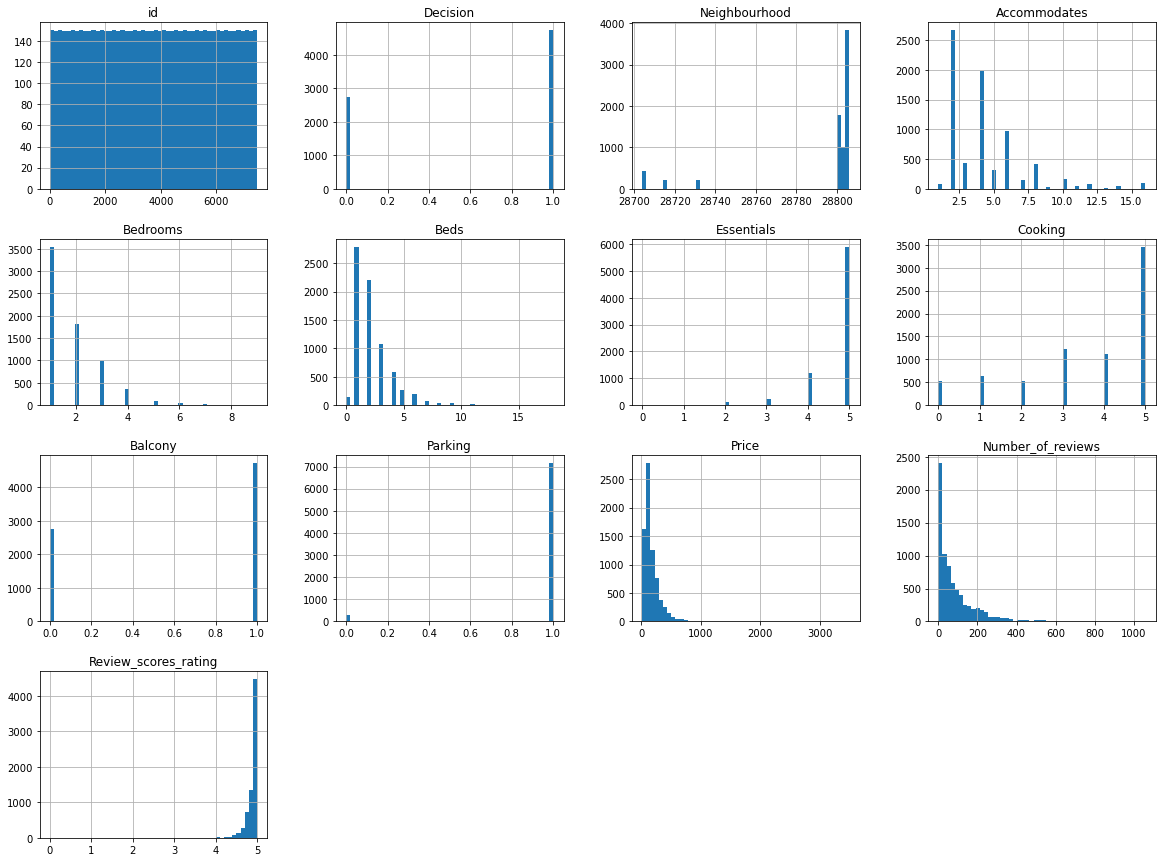

In [40]:
# Histogram:
df.hist(bins=50, figsize = (20,15))
plt.show()

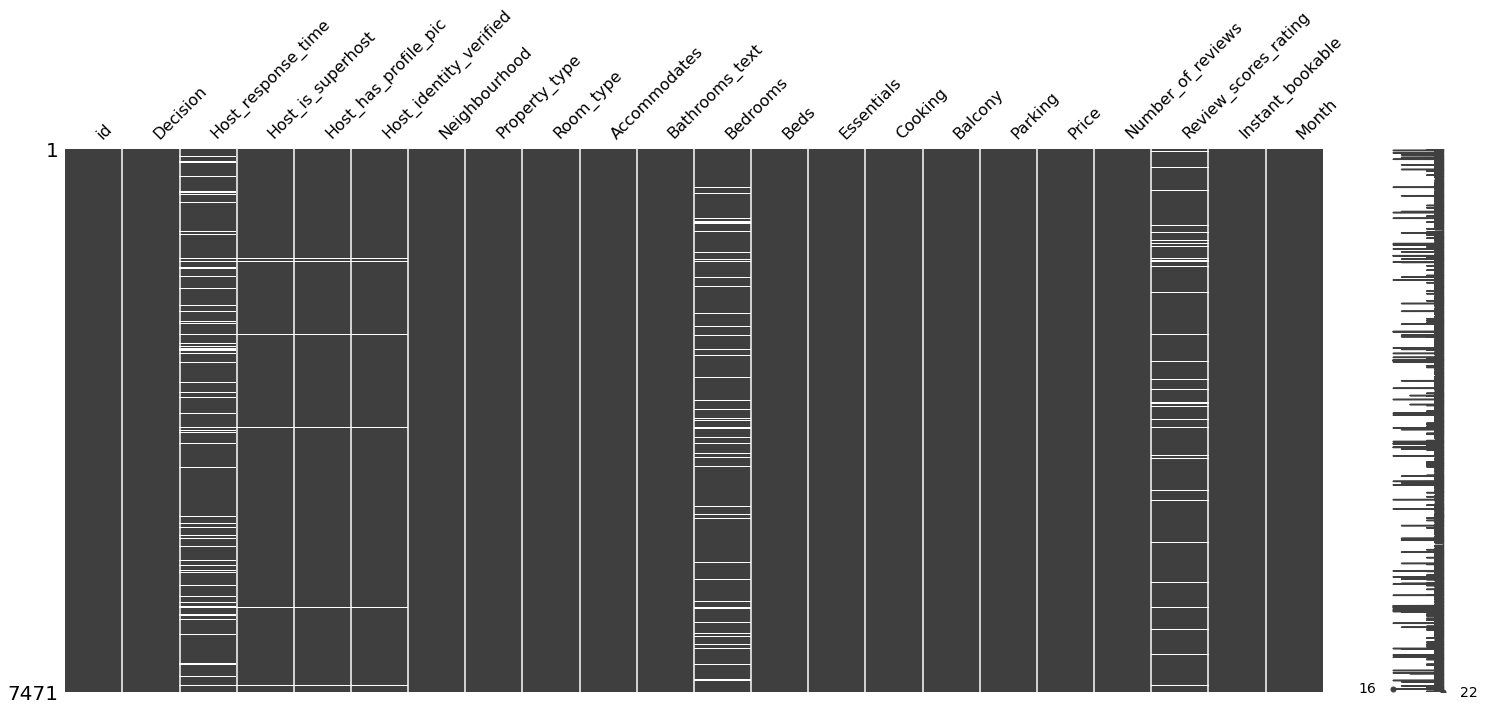

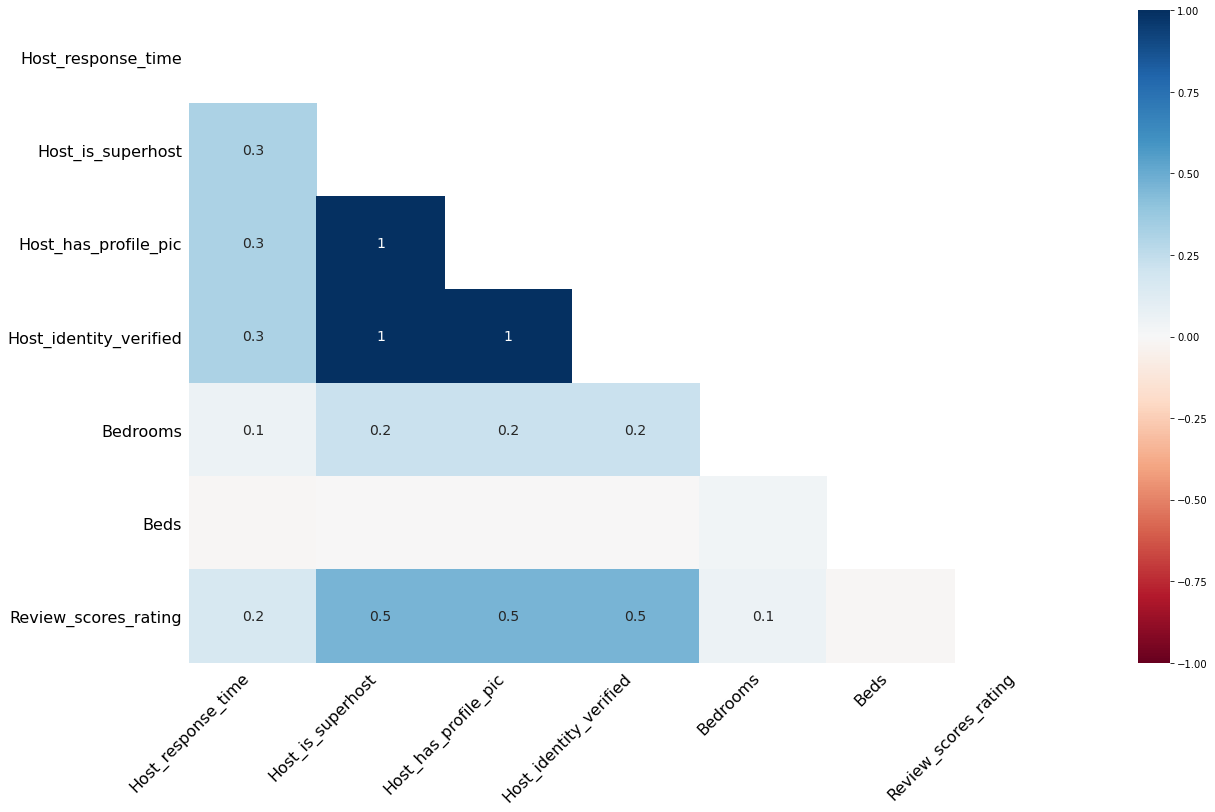

In [50]:
#Check missingness:
missing_matrix = msn.matrix(df)
missing_corr = msn.heatmap(df)
plt.show()

Matplotlib is building the font cache; this may take a moment.


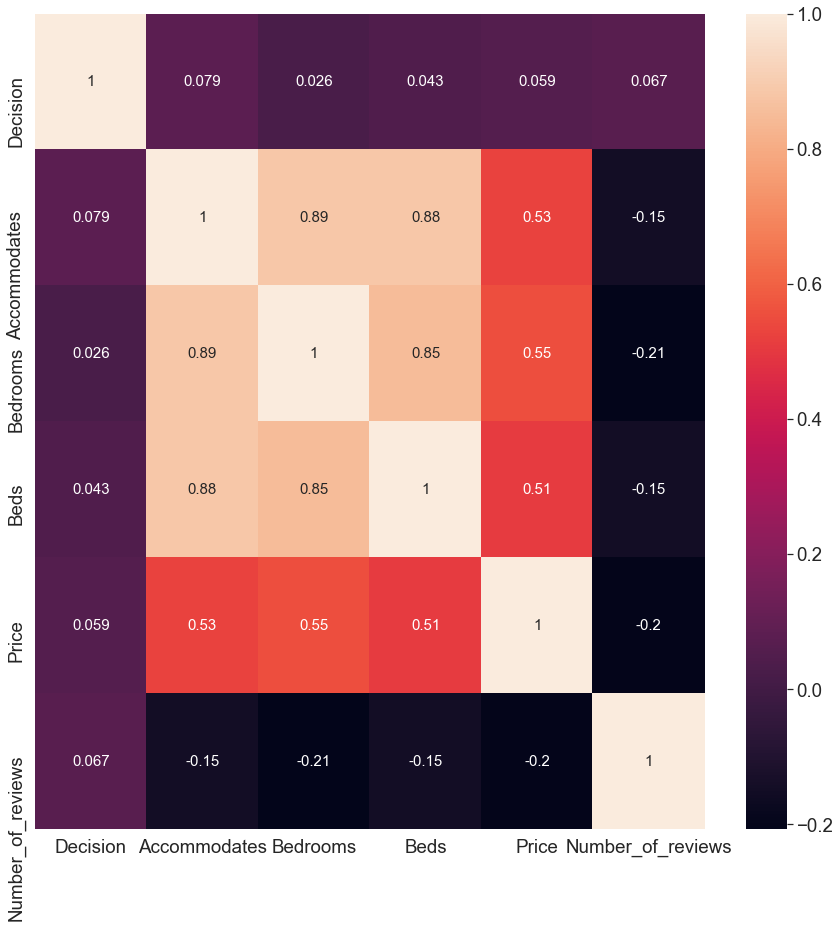

In [82]:
# check correlations between all features
# correlation_mat = df.corr()
# plt.figure(figsize=(18,18))
# top = correlation_mat.index
# corr_plot = sns.heatmap(df[top].corr(), annot=True)

x = df.drop(columns = ['Host_has_profile_pic', 'Property_type',
           'Bathrooms_text', 'Balcony', 'Parking', 'Neighbourhood', 'Cooking', 'Essentials', 
                       'Review_scores_rating'])

correlation_mat = x.corr()
plt.figure(figsize=(15,15))
top = correlation_mat.index
sns.set(font_scale=1.7)
corr_plot = sns.heatmap(df[top].corr(), annot=True, annot_kws={"fontsize":15})

plt.savefig('corr.png', facecolor='white')

In [60]:
# Using groupby, investigate correlations between different variables and decision

# Significant
print(df.groupby(['Room_type', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Host_is_superhost', 'Decision'], dropna=False).size())
# Unsignificant
print(df.groupby(['Host_has_profile_pic', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Host_identity_verified', 'Decision'], dropna=False).size())
# Significant, in general accomodating 8 or more had higher chance of being booked
print(df.groupby(['Accommodates', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Host_response_time', 'Decision'], dropna=False).size())
# Not super significant
print(df.groupby(['Neighbourhood', 'Decision'], dropna=False).size())
# Not significant, lots of different property types, only entire condominium has lots of 1's, few 0's, entire bungalow
# Has more 0's than 1's
print(df.groupby(['Property_type', 'Decision'], dropna=False).size())
# Unsignificant
print(df.groupby(['Bathrooms_text', 'Decision'], dropna=False).size())
# Unsignificant
print(df.groupby(['Balcony', 'Decision'], dropna=False).size())
# Unsignificant
print(df.groupby(['Parking', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Instant_bookable', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Month', 'Decision'], dropna=False).size())
# Significant
print(df.groupby(['Bedrooms', 'Decision'], dropna=False).size())
print(df.groupby(['Beds', 'Decision'], dropna=False).size())

Room_type        Decision
Entire home/apt  0           2333
                 1           3899
Hotel room       0              6
                 1             60
Private room     0            389
                 1            760
Shared room      0              8
                 1             16
dtype: int64
Host_is_superhost  Decision
f                  0            791
                   1           1133
t                  0           1909
                   1           3542
NaN                0             36
                   1             60
dtype: int64
Host_has_profile_pic  Decision
f                     0              4
                      1              9
t                     0           2696
                      1           4666
NaN                   0             36
                      1             60
dtype: int64
Host_identity_verified  Decision
f                       0            701
                        1            992
t                       0           199

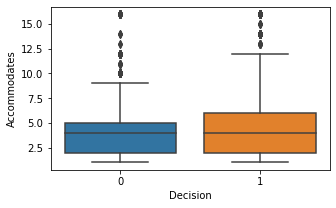

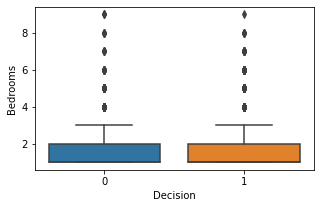

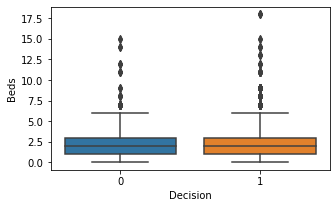

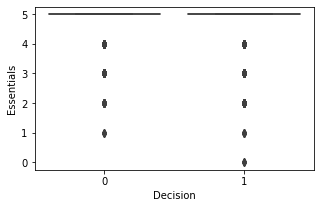

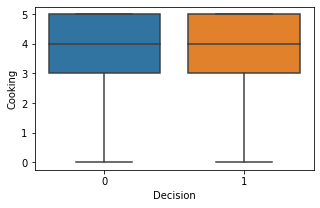

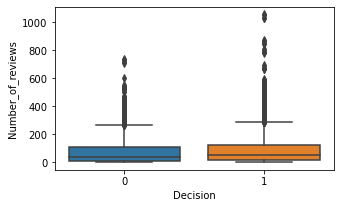

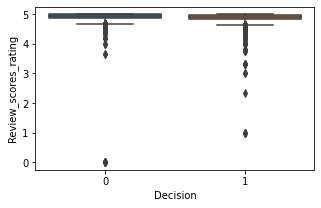

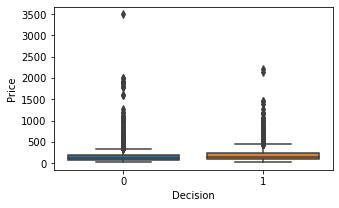

In [34]:
# Check out the relationship between continuous variables and decision
for var in ['Accommodates','Bedrooms','Beds','Essentials', 'Cooking', 
            'Number_of_reviews', 'Review_scores_rating', 'Price']:
    fig, ax = plt.subplots(figsize = (5,3))
    ax = sns.boxplot(x="Decision", y=var, data=df)

plt.show()

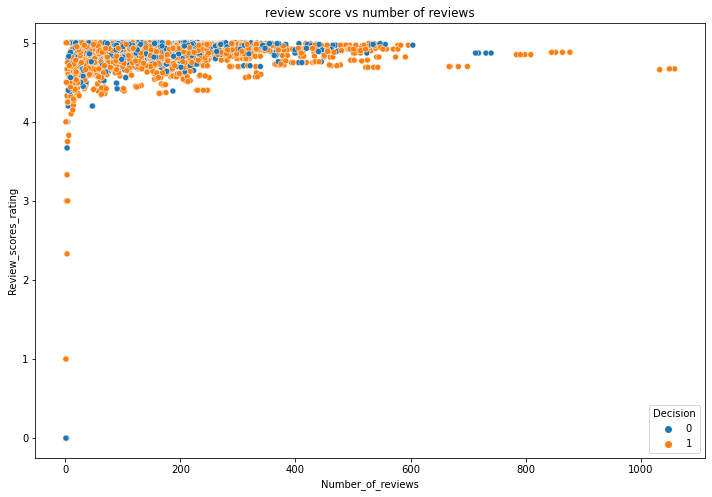

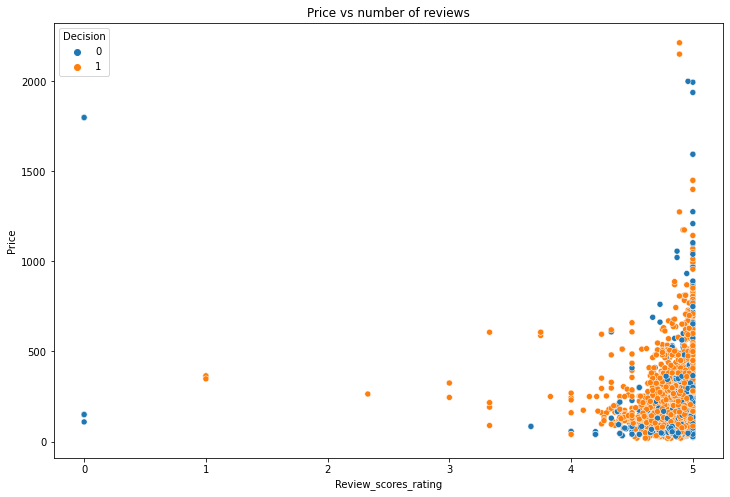

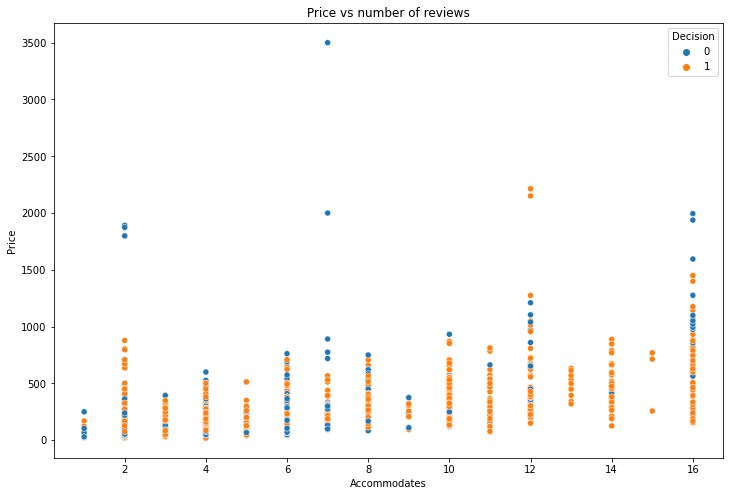

In [38]:
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.scatterplot(x="Number_of_reviews", y='Review_scores_rating', data = df, hue="Decision")
plt.title("review score vs number of reviews")
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.scatterplot(y="Price", x='Review_scores_rating', data = df, hue="Decision")
plt.title("Price vs number of reviews")
plt.show()

fig, ax = plt.subplots(figsize = (12,8))
ax = sns.scatterplot(y="Price", x='Accommodates', data = df, hue="Decision")
plt.title("Price vs number of reviews")
plt.show()

In [20]:
# segment the dataset by decision and again look at summary statistics
booked = df[df.Decision == 1]
unbooked = df[df.Decision == 0]
print(booked.describe())
print(unbooked.describe())

                id  Decision  Neighbourhood  Accommodates     Bedrooms  \
count  4735.000000    4735.0    4735.000000   4735.000000  4367.000000   
mean   3742.513622       1.0   28793.136008      4.460190     1.860545   
std    2140.680198       0.0      29.329871      2.926008     1.150800   
min       1.000000       1.0   28704.000000      1.000000     1.000000   
25%    1918.500000       1.0   28801.000000      2.000000     1.000000   
50%    3743.000000       1.0   28804.000000      4.000000     1.000000   
75%    5562.500000       1.0   28806.000000      6.000000     2.000000   
max    7471.000000       1.0   28806.000000     16.000000     9.000000   

              Beds   Essentials      Cooking      Balcony      Parking  \
count  4723.000000  4735.000000  4735.000000  4735.000000  4735.000000   
mean      2.346813     4.692291     3.611193     0.623231     0.951848   
std       1.824809     0.659125     1.603045     0.484627     0.214110   
min       0.000000     0.000000     0

In [44]:
df.isna().sum()

id                          0
Decision                    0
Host_response_time        858
Host_is_superhost          96
Host_has_profile_pic       96
Host_identity_verified     96
Neighbourhood               0
Property_type               0
Room_type                   0
Accommodates                0
Bathrooms_text              0
Bedrooms                  585
Beds                       13
Essentials                  0
Cooking                     0
Balcony                     0
Parking                     0
Price                       0
Number_of_reviews           0
Review_scores_rating      395
Instant_bookable            0
Month                       0
dtype: int64